# Displacement Between cluster groups

Instead of finding the displacement of individual clusters, we now make it such that the distance between vertexes is detected instead. This takes in 3 parameters right now. 

Parameters we take in are: name of the organ 
the number of clusters we want


In [7]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from cellpose import io
from pathlib import Path
import os
import pandas as pd
from Functions_Used import GetPointsList, GetVertexList, GetClusters, ShowClusterPlot
from Functions_Used import specificOutline, findVertex, dist, getROIName # gets you specific Outlines
from PIL import Image
# List of Files
# Importing all the files
# the folder containing the .npy and png (or .tif files) are stored 
npyDir = "Haltere" # CHANGE THIS
numOfClusters = 4 # This is the number of vertexes that are there
roi_name, files, dir, maskList = getROIName('', '/Users/birat/Onedrive/Documents/3D/Bug')


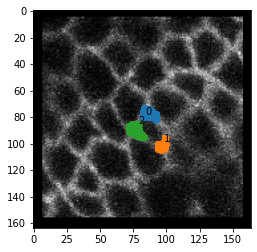

In [8]:
pointsList, M, O = GetPointsList(roi_name, dir)
mainVertexList = GetVertexList(roi_name, pointsList, maskList)
allx = GetClusters(numOfClusters, mainVertexList)
ShowClusterPlot(allx, files, "black") # if the number is not clear, change the color to smth visible

# from the image chose the vertex number that you want

In [ ]:
vert1 = 3
vert2 = 2
clus1 = allx.loc[allx["clusterNum"] == vert1] # select the cluster you want to look at
clus2 = allx.loc[allx["clusterNum"] == vert2] # select the cluster you want to look at 
f, ax = plt.subplots()
ax.scatter(clus1[1], clus1[0])
ax.scatter(clus2[1], clus2[0])
plt.imshow(Image.open(files[13]))

In [ ]:
displacement = []
X1avg, X2avg, Y1avg, Y2avg = ([] for i in range(4)) # defining lists
X1, X2, Y1, Y2 = ([] for i in range(4)) # defining lists
fnum = []

for k in range(max(max(clus1["frame"]), max(clus2["frame"]))):
    a = clus1.loc[clus1["frame"] == k] 
    b = clus2.loc[clus2["frame"] == k]
    if len(a) > 0 and len(b) > 0: 
        fnum.append(k)
        X1.append(a)
        X2.append(b)
        X1avg.append(a.mean()[0]) # many points for each frame. We take the average of all the detected points for a frame to get a centroid
        Y1avg.append(a.mean()[1]) # which is the assumed position of the vertex. 
        X2avg.append(b.mean()[0])
        Y2avg.append(b.mean()[1])
        
X1avg = np.array(X1avg)
X2avg = np.array(X2avg)
Y1avg = np.array(Y1avg)
Y2avg = np.array(Y2avg)

displacement = np.sqrt((Y2avg - Y1avg)**2 + (X2avg - X1avg)**2) # Getting the displacement

In [ ]:
a = pd.concat(X1)
print("Taking average of the values for given clusters")
k = pd.DataFrame({"x1": X1avg,  "y1": Y1avg, "x2": X2avg, "y2": Y2avg, "displacement": displacement})
k.to_csv("Displacement.csv")
# Generates a big table with the coordintes, frame number, and cluster number 
# Exports that table as a csv 
cluslist = []
for i in range(numOfClusters): 
    cluslist.append(allx.loc[allx["clusterNum"] == i])

biglist = pd.concat(cluslist).drop("labels", axis = "columns") # big table with all the points as 
biglist.to_csv("AllData.csv")

In [ ]:
import scipy.optimize

stepsize = (0.823 - 0.549)/2
tempX = np.arange(0.549, stepsize * (len(displacement) + 1), stepsize).tolist()
bigX = [ 0.549/3 * i for i in range(3)]
bigX = bigX + tempX
len(bigX)


def expon(t, a, b, c): 
    return a*t**b + c

displacement = displacement - displacement[0]

A = scipy.optimize.curve_fit(expon,  bigX,  displacement)
a, b, c = A[0]
nY = []
for i in bigX:
    nY.append(expon(i, a, b, c))

In [ ]:
plt.scatter(bigX, displacement)
plt.plot(bigX, nY)
plt.xlabel("Time (s)")
plt.ylabel("Displacement" + r' ($\mu$m)')

In [ ]:
displacement/np.mean(displacement)